In [1]:
import pandas as pd

In [2]:
# 1.1 Import the dataset
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

In [13]:
#1.2 Visualize the dataset
df.head(7)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
26,32305916,2015-12-31 23:26:41,2015-12-31 23:53:31,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,10031.0,452 WEST 147 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.826102,-73.945663,"(40.826101709196, -73.94566339279595)",1610.0
36,32306281,2015-12-31 23:13:47,2015-12-31 23:32:32,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11213.0,1285 ST JOHNS PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.670843,-73.935556,"(40.670842567107634, -73.93555563656233)",1125.0
38,32308014,2015-12-31 23:11:33,2015-12-31 23:41:01,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11211.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.714007,-73.941715,"(40.714007352909874, -73.94171469793936)",1768.0
40,32307354,2015-12-31 23:11:18,2015-12-31 23:16:13,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10017.0,862 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.752467,-73.970263,"(40.752466784765815, -73.97026303855291)",295.0
41,32308746,2015-12-31 23:10:03,2015-12-31 23:14:04,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Store/Commercial,11216.0,95 HALSEY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.681870,-73.949372,"(40.68186974794423, -73.94937196628798)",241.0
43,32308024,2015-12-31 23:09:25,2015-12-31 23:14:04,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11216.0,95 HALSEY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.681870,-73.949372,"(40.68186974794423, -73.94937196628798)",279.0
45,32308118,2015-12-31 23:08:41,2015-12-31 23:16:14,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10017.0,862 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.752467,-73.970263,"(40.752466784765815, -73.97026303855291)",453.0


In [20]:
#1.3 Print the columns of the DataFrame
print(df.columns)
#1.4 Identify the shape of the dataset
print(df.shape)
# 1.5 Identify the variables with null values
null_columns = df.columns[df.isnull().any()]
print("Columns with null values:", null_columns)

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

Index(['Descriptor', 'Incident Zip', 'Incident Address', 'Street Name',
       'Cross Street 1', 'Cross Street 2', 'Intersection Street 1',
       'Intersection Street 2', 'Address Type', 'City', 'Landmark',
       'Facility Type', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location'],
      dtype='object')


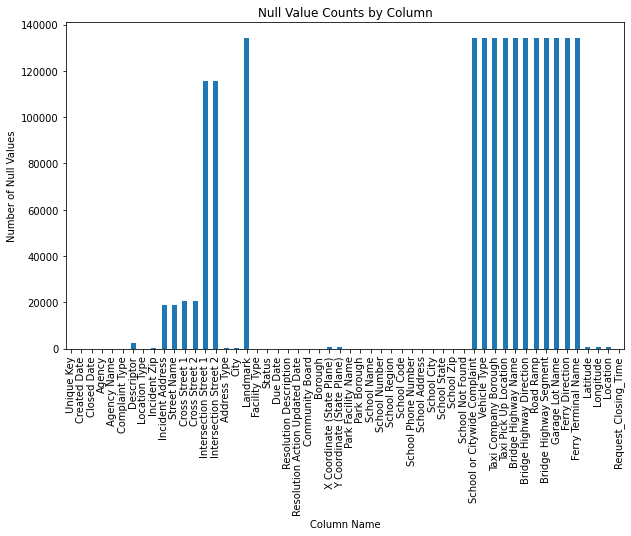

In [19]:
null_counts = df.isnull().sum()
# 2.1 Draw a frequency plot to show the number of null values in each column of the DataFrame
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
null_counts.plot(kind='bar', ax=ax)
ax.set_xlabel('Column Name')
ax.set_ylabel('Number of Null Values')
ax.set_title('Null Value Counts by Column')
plt.show()

In [7]:
# Based on above columns perform some base imputing for NaN values

In [8]:
# 2.2.1 Remove the records whose Closed Datevalues are null
df = df.dropna(subset=['Closed Date'])

# Drop records with incorrect timeline
df = df[(df['Created Date'] < df['Closed Date'])]

In [9]:
# 2.3.1 Calculate the time elapsed in closed and creation date
df["Created Date"] = pd.to_datetime(df["Created Date"]) 
df["Closed Date"] = pd.to_datetime(df["Closed Date"])

In [10]:
# 2.3.2 Convert the calculated date to seconds to get a better representation 
df["Request_Closing_Time"] = abs(df["Closed Date"] - df["Created Date"]).dt.total_seconds()

In [26]:
# 2.3.3 View the descriptive statistics for the newly created column
df["Request_Closing_Time"].describe()

count    1.342520e+05
mean     1.616950e+04
std      2.558931e+04
min      6.000000e+01
25%      4.260000e+03
50%      9.080500e+03
75%      1.848000e+04
max      2.078496e+06
Name: Request_Closing_Time, dtype: float64

In [27]:
# 2.3.4 Check the number of null values in the Complaint_Type and City columns
print("Null values in Complaint Type:", df['Complaint Type'].isnull().sum())
print("Null values in City:", df['City'].isnull().sum())

Null values in Complaint Type: 0
Null values in City: 191


In [28]:
#2.3.5 Impute the NA value with Unknown City
df['City'].fillna("Unknown City", inplace=True)


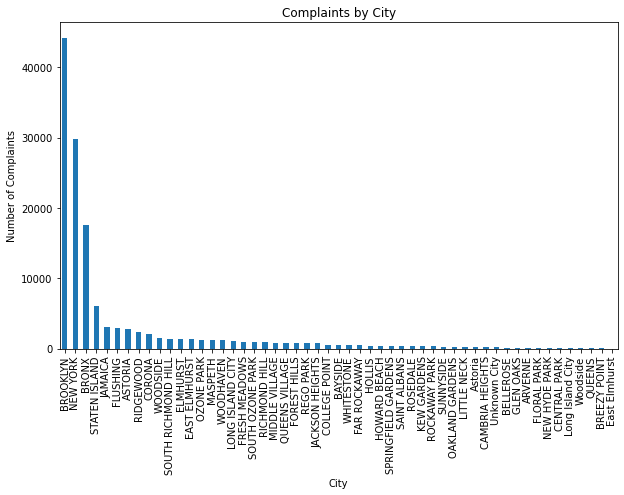

In [29]:
#2.3.6 Draw a frequency plot for the complaints in each city
fig, ax = plt.subplots(figsize=(10,6))
df['City'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('City')
ax.set_ylabel('Number of Complaints')
ax.set_title('Complaints by City')
plt.show()

In [21]:
df['City'] == "BROOKLYN"

26        False
36         True
38         True
40        False
41         True
          ...  
159992    False
159993    False
159994     True
159995    False
159996    False
Name: City, Length: 134252, dtype: bool

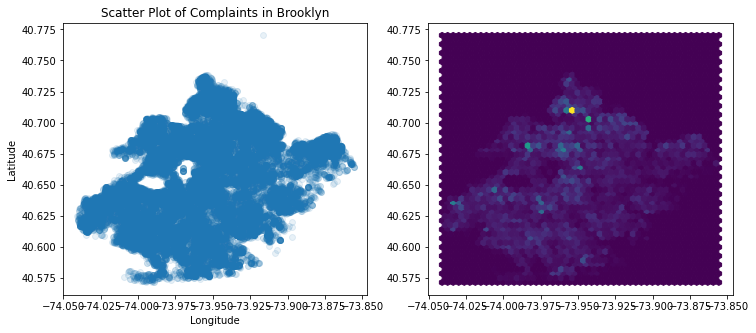

In [35]:
# 2.3.7 Create a scatter and hexbin plot of the concentration of complaints across Brooklyn
brooklyn_city = df[df['City'] == "BROOKLYN"] 
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
ax[0].scatter(brooklyn_city['Longitude'], brooklyn_city['Latitude'], alpha=0.1)
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title('Scatter Plot of Complaints in Brooklyn')
ax[1].hexbin(brooklyn_city['Longitude'], brooklyn_city['Latitude'], gridsize=50)

<AxesSubplot:>

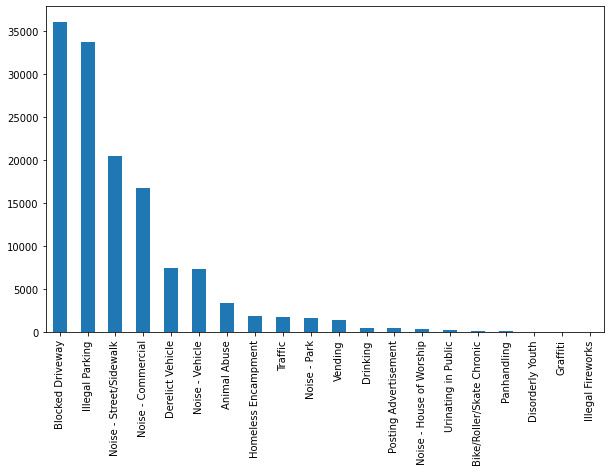

In [38]:
#3.1 Plot a bar graph to show the types of complaints
df['Complaint Type'].value_counts().plot(figsize=(10,6), kind = 'bar')

In [39]:
# 3.2 Check the frequency of various types of complaints for New York City
nyc_complaints = df[df['City'] == 'NEW YORK']['Complaint Type']
nyc_complaints.value_counts(normalize=True)

Noise - Street/Sidewalk      0.300298
Noise - Commercial           0.240453
Illegal Parking              0.179502
Noise - Vehicle              0.085560
Homeless Encampment          0.041238
Blocked Driveway             0.032621
Vending                      0.029738
Animal Abuse                 0.024843
Traffic                      0.021725
Noise - Park                 0.018306
Derelict Vehicle             0.007946
Drinking                     0.003923
Urinating in Public          0.003889
Bike/Roller/Skate Chronic    0.003017
Panhandling                  0.002984
Noise - House of Worship     0.002347
Posting Advertisement        0.000704
Disorderly Youth             0.000503
Graffiti                     0.000302
Illegal Fireworks            0.000101
Name: Complaint Type, dtype: float64

In [41]:
#3.3 Find the top 10 complaint types
top_10_complaints = df['Complaint Type'].value_counts().nlargest(10)
top_10_complaints

Blocked Driveway           36060
Illegal Parking            33738
Noise - Street/Sidewalk    20459
Noise - Commercial         16716
Derelict Vehicle            7487
Noise - Vehicle             7356
Animal Abuse                3381
Homeless Encampment         1922
Traffic                     1830
Noise - Park                1669
Name: Complaint Type, dtype: int64

In [52]:
#3.4 Display the various types of complaints in each city
complaints_by_city = df.groupby(['City', 'Complaint Type']).size().unstack()
complaints_by_city

Complaint Type,Animal Abuse,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,
ARVERNE,19.0,NaN,19.0,8.0,1.0,NaN,NaN,2.0,NaN,25.0,2.0,3.0,NaN,11.0,2.0,1.0,NaN,NaN,1.0,1.0
ASTORIA,51.0,14.0,1255.0,159.0,1.0,17.0,NaN,13.0,1.0,468.0,535.0,2.0,29.0,161.0,85.0,1.0,NaN,17.0,4.0,20.0
Astoria,NaN,NaN,30.0,6.0,NaN,NaN,NaN,NaN,NaN,72.0,75.0,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN
BAYSIDE,21.0,NaN,182.0,77.0,1.0,NaN,2.0,1.0,NaN,235.0,21.0,1.0,2.0,3.0,6.0,NaN,NaN,4.0,NaN,NaN
BELLEROSE,6.0,1.0,41.0,35.0,NaN,NaN,NaN,1.0,NaN,44.0,7.0,NaN,NaN,3.0,3.0,NaN,NaN,4.0,NaN,NaN
BREEZY POINT,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
BRONX,610.0,9.0,5884.0,859.0,20.0,76.0,5.0,87.0,3.0,3426.0,1273.0,30.0,228.0,3501.0,1309.0,10.0,5.0,154.0,20.0,129.0
BROOKLYN,1001.0,48.0,13261.0,2232.0,29.0,97.0,14.0,376.0,7.0,12271.0,5240.0,161.0,649.0,5817.0,2198.0,17.0,22.0,474.0,65.0,202.0
CAMBRIA HEIGHTS,5.0,NaN,74.0,53.0,NaN,NaN,NaN,2.0,NaN,33.0,5.0,NaN,NaN,10.0,22.0,NaN,NaN,1.0,NaN,NaN


In [43]:
#3.5 Create a DataFrame, df_new, which contains cities as columns and complaint types in rows
df_new = df.groupby(['Complaint Type', 'City']).size().unstack(fill_value=0)
df_new

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,19,51,0,21,6,1,610,1001,5,0,...,24,12,11,240,14,1,6,24,20,0
Bike/Roller/Skate Chronic,0,14,0,0,1,0,9,48,0,0,...,0,1,0,3,1,1,3,2,3,0
Blocked Driveway,19,1255,30,182,41,3,5884,13261,74,0,...,450,733,127,1066,98,24,98,520,730,6
Derelict Vehicle,8,159,6,77,35,0,859,2232,53,0,...,154,129,86,768,5,11,98,148,110,1
Disorderly Youth,1,1,0,1,0,0,20,29,0,0,...,0,0,0,4,0,0,0,0,0,0
Drinking,0,17,0,0,0,0,76,97,0,0,...,6,8,1,136,3,1,0,1,8,0
Graffiti,0,0,0,2,0,0,5,14,0,0,...,0,0,0,2,0,0,0,0,1,0
Homeless Encampment,2,13,0,1,1,0,87,376,2,0,...,3,7,0,38,1,1,0,7,8,0
Illegal Fireworks,0,1,0,0,0,0,3,7,0,0,...,0,0,0,1,0,0,0,0,0,0


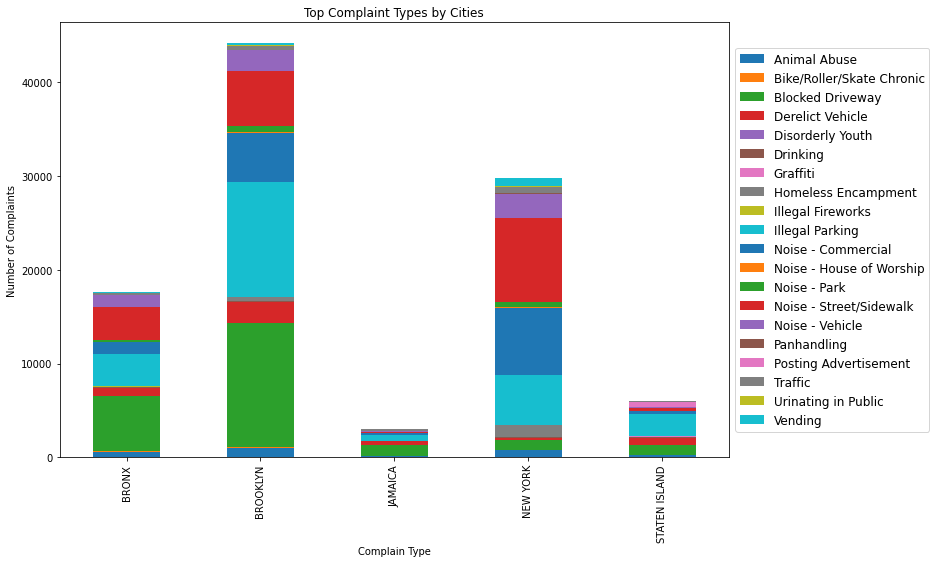

In [46]:
# 4.1 Draw another chart that shows the types of complaints in each city in a single chart, where different colors show the different types of complaints
# performed it only for 5 Cities with largest amount of complains to make the bar readable. When I ran it for all cities, the process takes too much time
top_5_cities = df['City'].value_counts().nlargest(5).index.tolist()
df_top_5_cities = df[df['City'].isin(top_5_cities)]
complaints_by_city = pd.pivot_table(df_top_5_cities, index='City', columns='Complaint Type', aggfunc='count')
ax = complaints_by_city.plot(kind='bar', stacked=True, figsize=(12,8))

ax.set_title('Top Complaint Types by Cities')
ax.set_xlabel('Complain Type')
ax.set_ylabel('Number of Complaints')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

In [47]:
# 4.2 Sort the complaint types based on the average Request_Closing_Time grouping them for different locations
df_grouped = df.groupby(['City', 'Complaint Type'])['Request_Closing_Time'].agg('mean').reset_index()
df_sorted = df_grouped.sort_values('Request_Closing_Time', ascending=False).reset_index().drop(columns='index')
df_sorted

,City,Complaint Type,Request_Closing_Time
0,BELLEROSE,Homeless Encampment,140880.000000
1,SOUTH RICHMOND HILL,Bike/Roller/Skate Chronic,111277.000000
2,CAMBRIA HEIGHTS,Traffic,107307.000000
3,FLORAL PARK,Animal Abuse,95696.500000
4,FLORAL PARK,Derelict Vehicle,95602.590909
...,...,...,...
635,FLUSHING,Illegal Fireworks,1140.000000
636,RIDGEWOOD,Graffiti,1100.000000
637,RIDGEWOOD,Illegal Fireworks,969.000000
638,ASTORIA,Noise - House of Worship,953.000000


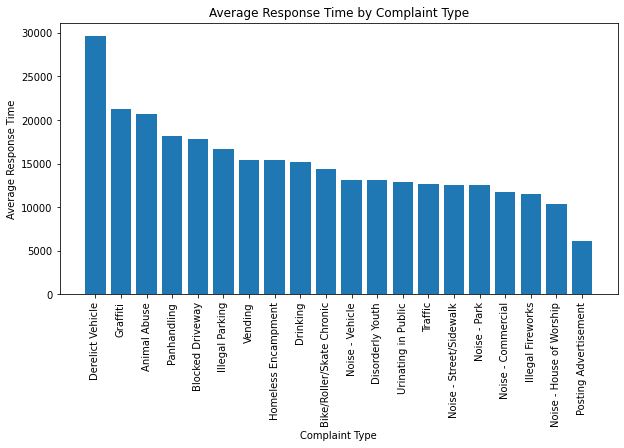

In [117]:
#5.1 Visualize the average of Request_Closing_Time complaint types is similar (overall)
mean_response_time = df.groupby('Complaint Type')['Request_Closing_Time'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.bar(mean_response_time.index, mean_response_time.values)
plt.xticks(rotation=90)
plt.title('Average Response Time by Complaint Type')
plt.xlabel('Complaint Type')
plt.ylabel('Average Response Time')
plt.show()

In [126]:
# 6. Identify the significant variables by performing statistical analysis using p-values   
import itertools

# 4 Four Complaint Types with largest Request Closing Time choosen for the tests
complaint_types = [
    'Derelict Vehicle',
    'Graffiti',
    'Animal Abuse',
    'Panhandling',
]

# Perform t-tests for all pairs of complaint types
for type1, type2 in itertools.combinations(complaint_types, 2):
    df1 = df[df['Complaint Type'] == type1]['Request_Closing_Time']
    df2 = df[df['Complaint Type'] == type2]['Request_Closing_Time']
    
    # Perform a two-sample t-test with equal variances
    t_stat, p_val = stats.ttest_ind(df1, df2, equal_var=True)
    
    # Print the results
    print(f"T-test between '{type1}' and '{type2}':")
    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_val}")
    if p_val < 0.05:
        print("Reject null hypothesis: The two groups have different average response times.")
    else:
        print("Fail to reject null hypothesis: The two groups have similar average response times.")
    print()

T-test between 'Derelict Vehicle' and 'Graffiti':
t-statistic: 1.1289922477138927
p-value: 0.25893708406735966
Fail to reject null hypothesis: The two groups have similar average response times.

T-test between 'Derelict Vehicle' and 'Animal Abuse':
t-statistic: 9.33277904092991
p-value: 1.2317280600032738e-20
Reject null hypothesis: The two groups have different average response times.

T-test between 'Derelict Vehicle' and 'Panhandling':
t-statistic: 2.8182306364013043
p-value: 0.00484134165918926
Reject null hypothesis: The two groups have different average response times.

T-test between 'Graffiti' and 'Animal Abuse':
t-statistic: 0.09212941835962067
p-value: 0.9266006096936426
Fail to reject null hypothesis: The two groups have similar average response times.

T-test between 'Graffiti' and 'Panhandling':
t-statistic: 0.42235601794739014
p-value: 0.673260983435033
Fail to reject null hypothesis: The two groups have similar average response times.

T-test between 'Animal Abuse' and 

In [137]:
#7 Perform a Kruskal-Wallis H test
#7.1 Fail to reject H0: All sample distributions are equal
#7.2 Reject H0: One or more sample distributions are not equal

import itertools

# 4 Four Complaint Types with largest Request Closing Time
complaint_type_1 = 'Derelict Vehicle'
complaint_type_2 = 'Graffiti'
complaint_type_3 = 'Animal Abuse'
complaint_type_4 = 'Panhandling'

# Filter the DataFrame for the selected complaint types
df_1 = df[df['Complaint Type'] == complaint_type_1]['Request_Closing_Time']
df_2 = df[df['Complaint Type'] == complaint_type_2]['Request_Closing_Time']
df_3 = df[df['Complaint Type'] == complaint_type_3]['Request_Closing_Time']
df_4 = df[df['Complaint Type'] == complaint_type_4]['Request_Closing_Time']

# Perform a Kruskal-Wallis H test
h_stat, p_val = stats.kruskal(df_1, df_2, df_3)

if p_val < 0.05:
    print("Reject H0: One or more distributions are not equal")
else:
    print("Fail to reject H0: All distributions are equal")
print(f"H-statistic: {h_stat}")
print(f"p-value: {p_val}")

Reject H0: One or more distributions are not equal
H-statistic: 46.541485113006964
p-value: 7.827893672193338e-11
